In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [157]:
df = pd.read_csv('accident.csv')
df.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           199 non-null    object 
 2   Speed_of_Impact  197 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


In [159]:
print(df.isnull().sum())

Age                0
Gender             1
Speed_of_Impact    3
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64


In [160]:
df = df.fillna({"Gender": df["Gender"].mode()[0], "Speed_of_Impact": df["Speed_of_Impact"].median()})

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           200 non-null    object 
 2   Speed_of_Impact  200 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


In [162]:
df = pd.get_dummies(df, columns=["Gender", "Helmet_Used", "Seatbelt_Used"], drop_first=True)

In [163]:
df = df.astype(int)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                200 non-null    int64
 1   Speed_of_Impact    200 non-null    int64
 2   Survived           200 non-null    int64
 3   Gender_Male        200 non-null    int64
 4   Helmet_Used_Yes    200 non-null    int64
 5   Seatbelt_Used_Yes  200 non-null    int64
dtypes: int64(6)
memory usage: 9.5 KB


In [165]:
df.describe()

,Age,Speed_of_Impact,Survived,Gender_Male,Helmet_Used_Yes,Seatbelt_Used_Yes
count,200.00000,200.000000,200.00000,200.000000,200.000000,200.000000
mean,43.42500,70.450000,0.50500,0.445000,0.555000,0.555000
std,14.94191,29.897438,0.50123,0.498213,0.498213,0.498213
min,18.00000,20.000000,0.00000,0.000000,0.000000,0.000000
25%,31.00000,43.000000,0.00000,0.000000,0.000000,0.000000
50%,43.50000,71.000000,1.00000,0.000000,1.000000,1.000000
75%,56.00000,95.000000,1.00000,1.000000,1.000000,1.000000
max,69.00000,119.000000,1.00000,1.000000,1.000000,1.000000


In [166]:
print(df.isnull().sum())

Age                  0
Speed_of_Impact      0
Survived             0
Gender_Male          0
Helmet_Used_Yes      0
Seatbelt_Used_Yes    0
dtype: int64


# 1. Demographic Analysis

In [167]:
# What is the average age of accident victims?
print("average age of accident victims =",df["Age"].mean())

average age of accident victims = 43.425


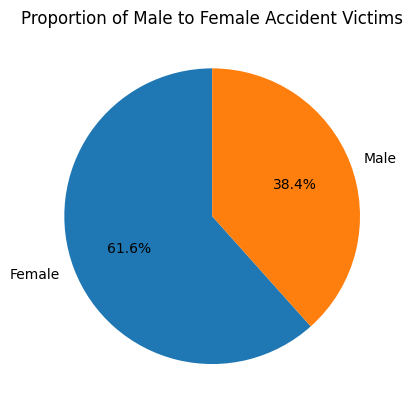

In [168]:
# What is the proportion of male to female accident victims?
plt.pie(df[df["Survived"]==0]["Gender_Male"].value_counts().values, labels=["Female", "Male"], autopct="%1.1f%%", startangle=90)
plt.title("Proportion of Male to Female Accident Victims")
plt.show()

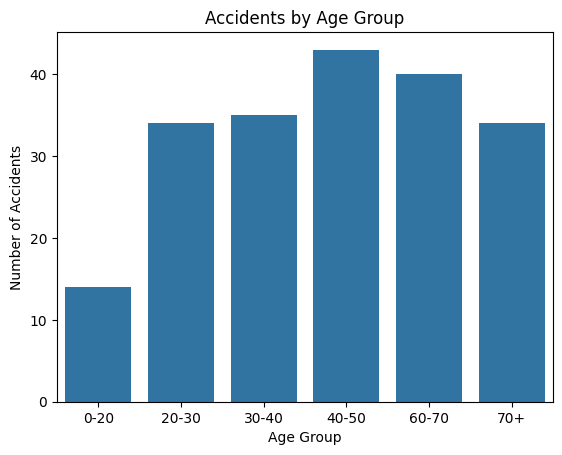

In [169]:
# Are there specific age groups that are more prone to accidents?
df["Age_Group"] = pd.cut(df["Age"], bins=[0, 20, 30, 40, 50, 60, 100] , labels=["0-20", "20-30", "30-40", "40-50", "60-70","70+"])
sns.countplot(x=df["Age_Group"])
plt.xlabel("Age Group")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Age Group")
plt.show()

# 2. Impact of Safety Measures

([<matplotlib.axis.YTick at 0x23ea720dd10>,
 [Text(0, 0.0, '0%'),
  Text(0, 0.2, '20%'),
  Text(0, 0.4, '40%'),
  Text(0, 0.6, '60%'),
  Text(0, 0.8, '80%'),
  Text(0, 1.0, '100%')])

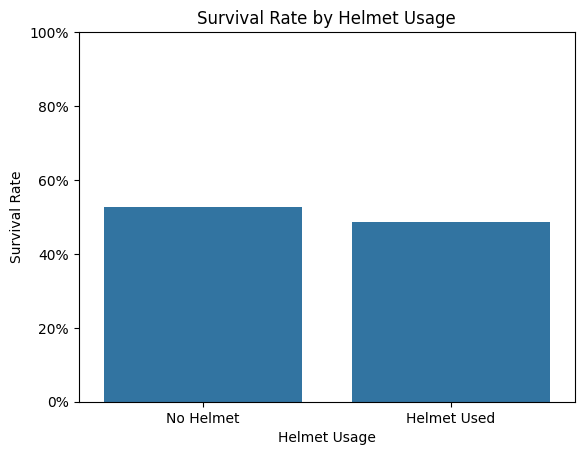

In [170]:
# How does helmet usage correlate with survival rates?
sns.barplot(x='Helmet_Used_Yes', y='Survived', data=df, errorbar=None)
plt.xticks([0, 1], ["No Helmet", "Helmet Used"])
plt.xlabel("Helmet Usage")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Helmet Usage")
plt.ylim(0, 1) 
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], ["0%", "20%", "40%", "60%", "80%", "100%"])

In [171]:
# What percentage of accident victims were wearing seatbelts?
seatbelt_usage_percent =df[df["Seatbelt_Used_Yes"]&(df["Survived"]==0)]

print((seatbelt_usage_percent["Age"].count()/df["Age"].count())*100)


26.0


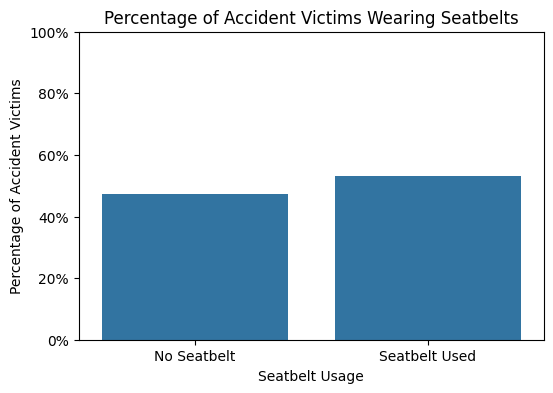

In [172]:
# How does seatbelt usage affect survival rates?
plt.figure(figsize=(6, 4))
sns.barplot(x="Seatbelt_Used_Yes", y="Survived", data=df, errorbar=None,)
plt.xticks([0, 1], ["No Seatbelt", "Seatbelt Used"])
plt.xlabel("Seatbelt Usage")
plt.ylabel("Percentage of Accident Victims")
plt.title("Percentage of Accident Victims Wearing Seatbelts")
plt.ylim(0, 1)  
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], ["0%", "20%", "40%", "60%", "80%", "100%"])
plt.show()


# 3. Speed and Severity

In [173]:
# What is the highest recorded speed of impact in the dataset, and what were the outcomes?
max_speed = df["Speed_of_Impact"].max()
highest_speed_data = df[df["Speed_of_Impact"] == max_speed]
print(highest_speed_data[["Speed_of_Impact", "Survived", "Helmet_Used_Yes", "Seatbelt_Used_Yes"]])

     Speed_of_Impact  Survived  Helmet_Used_Yes  Seatbelt_Used_Yes
174              119         0                1                  1
180              119         1                1                  1


# 4. Comparative Insights

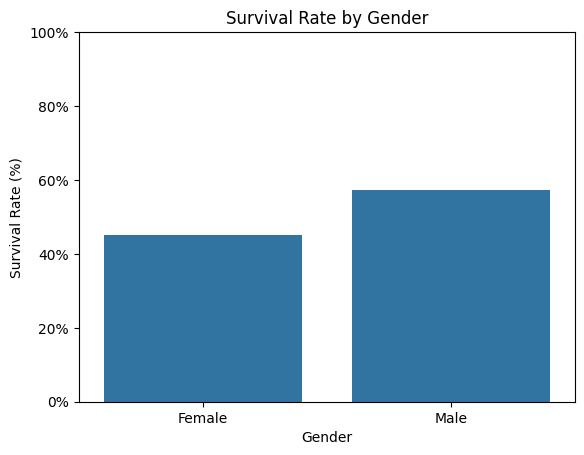

In [174]:
# Are males or females more likely to survive accidents?
gender_survival = df.groupby("Gender_Male")["Survived"].mean() * 100  
sns.barplot(x=gender_survival.index, y=gender_survival.values)
plt.xticks([0, 1], ["Female", "Male"])
plt.xlabel("Gender")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by Gender")
plt.ylim(0, 100)
plt.yticks([0, 20, 40, 60, 80, 100], ["0%", "20%", "40%", "60%", "80%", "100%"])
plt.show()

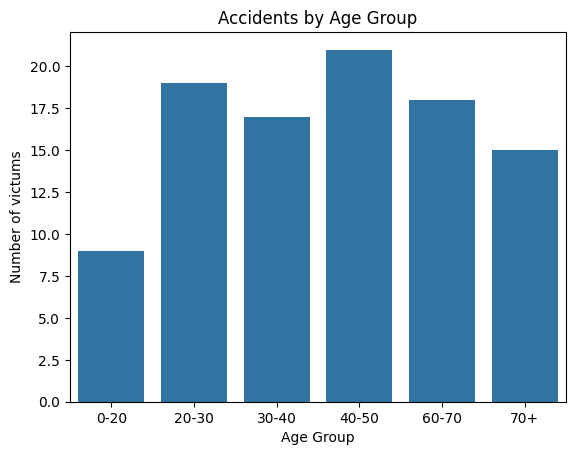

In [175]:
# Do younger individuals have a higher survival rate than older individuals?
df["Age_Group"] = pd.cut(df[df["Survived"]==0]["Age"], bins=[0, 20, 30, 40, 50, 60, 100] , labels=["0-20", "20-30", "30-40", "40-50", "60-70","70+"])
sns.countplot(x=df["Age_Group"])
plt.xlabel("Age Group")
plt.ylabel("Number of victums")
plt.title("Accidents by Age Group")
plt.show()

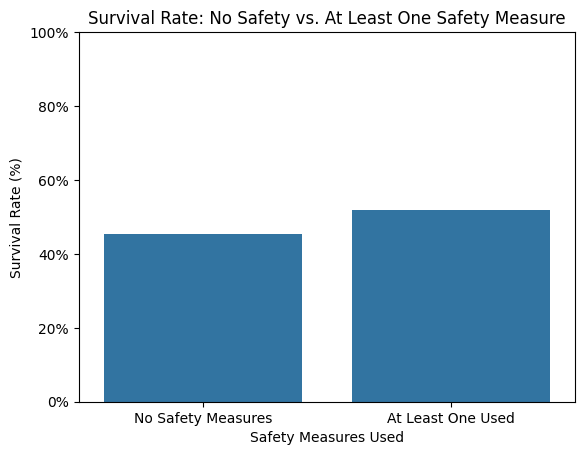

In [176]:
# How do accident outcomes differ between individuals who used at least one safety measure vs. those who used none?
df["Used_Safety"] = (df["Helmet_Used_Yes"] | df["Seatbelt_Used_Yes"])
safety_survival = df.groupby("Used_Safety")["Survived"].mean() * 100 
sns.barplot(x=safety_survival.index, y=safety_survival.values)
plt.xticks([0, 1], ["No Safety Measures", "At Least One Used"])
plt.xlabel("Safety Measures Used")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate: No Safety vs. At Least One Safety Measure")
plt.ylim(0, 100)
plt.yticks([0, 20, 40, 60, 80, 100], ["0%", "20%", "40%", "60%", "80%", "100%"])
plt.show()

# Data scaling 

In [185]:
scaler = StandardScaler()
columns_to_scale = ["Age", "Speed_of_Impact"] 
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df.drop("Age_Group",axis=1)

,Age,Speed_of_Impact,Survived,Gender_Male,Helmet_Used_Yes,Seatbelt_Used_Yes,Used_Safety
0,0.843704,-1.456949,1,0,0,0,0
1,1.715924,-0.819848,1,0,0,1,1
2,0.172767,-0.819848,0,1,1,1,1
3,-0.766547,1.560897,0,1,0,1,1
4,1.112080,-1.021038,0,0,1,1,1
...,...,...,...,...,...,...,...
195,1.715924,1.359707,1,0,0,1,1
196,-0.900734,-0.652190,1,0,0,1,1
197,0.977892,1.326175,1,1,0,1,1
198,-1.571672,1.091454,1,1,0,1,1


# KNN

In [189]:
X = df[['Age', 'Speed_of_Impact', 'Gender_Male', 'Used_Safety']]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)  # k=5 is a common starting point
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Model Accuracy: {accuracy:.2f}")

KNN Model Accuracy: 0.55
